## Resources

[Generate Image Embeddings Tutorial](https://www.activeloop.ai/resources/generate-image-embeddings-using-a-pre-trained-cnn-and-store-them-in-hub/)

## Setup kaggle keys

In [ ]:
# create the .kaggle directory and an empty kaggle.json file
!mkdir -p ~/.kaggle
!touch ~/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# Fill in your user name and key from creating the kaggle account and API token file
import json
kaggle_username = "XXXXXXXXX"
kaggle_key = "XXXXXXXXX"

# Save API token the kaggle.json file
with open("~/.kaggle/kaggle.json", "w") as f:
    f.write(json.dumps({"username": kaggle_username, "key": kaggle_key}))

## Imports

In [96]:
import glob

import torch
from torchvision import datasets, transforms
import numpy as np
from numpy.linalg import norm
from PIL import Image

import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

## Download datasetdatasets

In [3]:
# Dog breed images dataset
# Download the dataset, it will be in a .zip file so you'll need to unzip it as well.
!kaggle datasets download -d eward96/dog-breed-images 
# If you already downloaded it you can use the -o command to overwrite the file
!unzip -n dog-breed-images.zip -d data

dog-breed-images.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  dog-breed-images.zip
  inflating: data/bernese_mountain_dog/bernese1.jpg  
  inflating: data/bernese_mountain_dog/bernese10.jpg  
  inflating: data/bernese_mountain_dog/bernese100.jpg  
  inflating: data/bernese_mountain_dog/bernese11.jpg  
  inflating: data/bernese_mountain_dog/bernese12.jpg  
  inflating: data/bernese_mountain_dog/bernese13.jpg  
  inflating: data/bernese_mountain_dog/bernese14.jpg  
  inflating: data/bernese_mountain_dog/bernese15.jpg  
  inflating: data/bernese_mountain_dog/bernese16.jpg  
  inflating: data/bernese_mountain_dog/bernese17.jpg  
  inflating: data/bernese_mountain_dog/bernese18.jpg  
  inflating: data/bernese_mountain_dog/bernese19.jpg  
  inflating: data/bernese_mountain_dog/bernese2.jpg  
  inflating: data/bernese_mountain_dog/bernese20.jpg  
  inflating: data/bernese_mountain_dog/bernese21.jpg  
  inflating: data/bernese_mountain_dog/be

In [4]:
!ls data

bernese_mountain_dog dachshund            pug
border_collie        golden_retriever     siberian_husky
chihuahua            jack_russell
corgi                labrador


In [44]:
data_dir = "data"
list_images = glob.glob(data_dir+"/**/*.jpg")
print(f"There are {len(list_images)} images in the dataset.")

There are 918 images in the dataset.


## Create dataloader

In [45]:
# hyperparameters
batch_size = 10

In [46]:
transform = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor()
])

imageset = datasets.ImageFolder(data_dir, transform=transform)
imageloader = torch.utils.data.DataLoader(imageset, batch_size=batch_size)

print(len(imageset))

918


## Generate image embeddings

In [47]:
# fetch pretrained model
model = torch.hub.load('pytorch/vision', 'resnet18', weights="ResNet18_Weights.IMAGENET1K_V1")
model

Using cache found in /Users/martinoywa/.cache/torch/hub/pytorch_vision_main


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [48]:
# select the layer we want to extract features from, which is are the features before the classification part
layer = model._modules.get("avgpool")

In [49]:
# we use the register_forward_hook module to get the embeddings
def copy_embeddings(m, i, o):
    """
        Copy embeddings from the penultimate layer/ layer before classification.
        Called everytime after forward() has computed an output and save to our list
    """
    o = o[:,:,0,0].detach().numpy().tolist()
    output.append(o)
    
output = []

# attach hook to the layer
_ = layer.register_forward_hook(copy_embeddings)

In [50]:
# inference model
model.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [51]:
# generate embeddings
for data, target in imageloader:
    _ = model(data)
    
print(len(output))

92


In [52]:
# flatten list of embeddings to remove batches
list_embeddings = [item for sublist in output for item in sublist]

print(len(list_embeddings)) # returns 918
print(np.array(list_embeddings[0]).shape) # returns (512,)

918
(512,)


In [53]:
embeddings = np.array(list_embeddings)
embeddings[:2], embeddings.shape

(array([[0.36547202, 1.67981613, 1.3295418 , ..., 1.5213784 , 2.23868632,
         0.21798338],
        [0.81616199, 1.4296031 , 1.47882056, ..., 0.91564775, 2.27522206,
         0.07534631]]),
 (918, 512))

In [54]:
# As expected, the length of the new flattened list list_embeddings is equal to 918 which is the number of images we have in this dog breed dataset. 
# Plus, the shape of the first item in the list list_embeddings is (512,) which corresponds to the shape of the output of the avgpool layer.

## Inference

In [72]:
def cosine_similarity(image_embeddings, embedding_vector):
    return np.dot(embedding_vector, image_embeddings) / (norm(embedding_vector, axis=1)*norm(image_embeddings))

In [59]:
image_path = "data/chihuahua/chihuahua10.jpg"
image = Image.open(image_path)

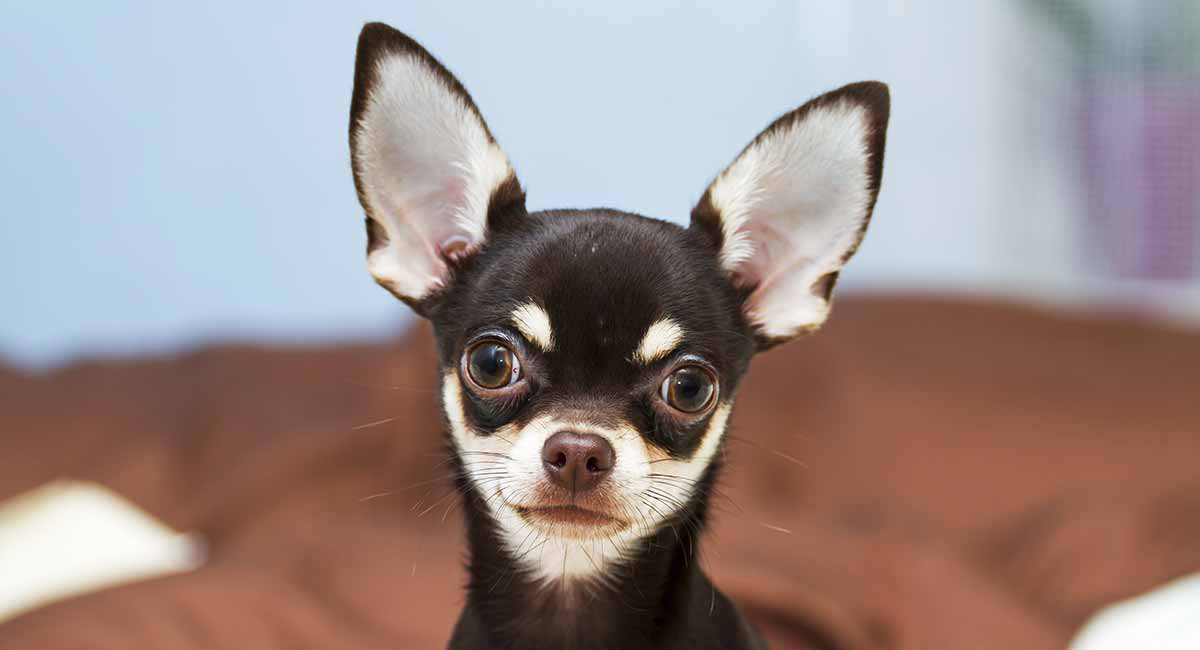

In [60]:
image

In [62]:
def inference(image):
    # reset output being hooked
    output = []
    model(image_tensor)
    image_embeddings = np.array(output[-1][0])
    return image_embeddings

tensor([[-2.4709e+00,  1.2387e+00,  2.2895e+00,  1.6946e-01,  3.2992e+00,
          3.0559e+00, -2.6348e+00,  1.8081e+00,  1.3316e+00, -2.4745e+00,
         -4.1664e+00, -3.8637e+00, -2.7132e+00, -6.5011e-01, -5.4119e+00,
         -1.8163e+00,  1.6051e-01,  2.4204e+00, -2.0306e+00, -1.3686e+00,
         -2.9751e+00, -1.5741e+00, -4.5287e+00, -1.5585e+00, -3.7937e+00,
         -2.5302e+00, -1.4555e+00, -4.0292e+00, -1.5356e+00,  1.2740e+00,
         -4.5428e+00, -1.3987e+00, -3.8808e+00, -1.0679e+00,  1.4369e-01,
         -1.5373e+00,  3.0225e-01,  2.1577e-01, -3.0592e-01, -1.7922e+00,
         -1.3541e+00, -4.1337e+00, -9.8130e-01, -1.3627e-01, -3.4759e+00,
         -4.0615e+00, -4.1588e-01,  2.4686e+00, -3.8907e+00, -5.0897e+00,
         -4.4161e+00,  5.3555e+00, -2.9359e+00, -3.3616e+00,  8.7096e-01,
         -2.7454e+00, -1.2310e+00, -3.4709e+00, -2.9764e+00, -3.8508e+00,
         -2.9786e+00, -1.1630e+00, -2.9305e+00, -1.2761e+00, -2.4703e+00,
         -4.7152e+00,  1.7441e+00, -1.

In [68]:
# get image embeddings
image_tensor = transform(image).unsqueeze(0)
image_embeddings = inference(image_tensor)

In [76]:
# calculate similarities
similarities = cosine_similarity(image_embeddings, embeddings)

In [84]:
def top_k_similar_images(arr, k):
    """
    Returns the indices of the top k highest values in a numpy array.
    """
    indices = np.argpartition(arr, -k)[-k:]
    top_k_indices = indices[np.argsort(arr[indices])[::-1]]
    return top_k_indices

In [85]:
# get top-k similar images
top_10 = top_k_similar_images(similarities, 10)

In [121]:
def display_similar_images(top_k_indices):
    labels = imageset.classes
    fig, axes = plt.subplots(nrows=1, ncols=len(labels), figsize=(50, 40))

    for i in range(len(top_k_indices)):
        image_path, label = imageset.imgs[top_k_indices[i]][0], imageset.imgs[top_k_indices[i]][1]
        image = mpimg.imread(image_path)
        axes[i].imshow(image)
        axes[i].set_title(f"Label: {labels[label]}, \nSimilarity Score: {similarities[top_k_indices[i]]:.2f}")
    plt.show()

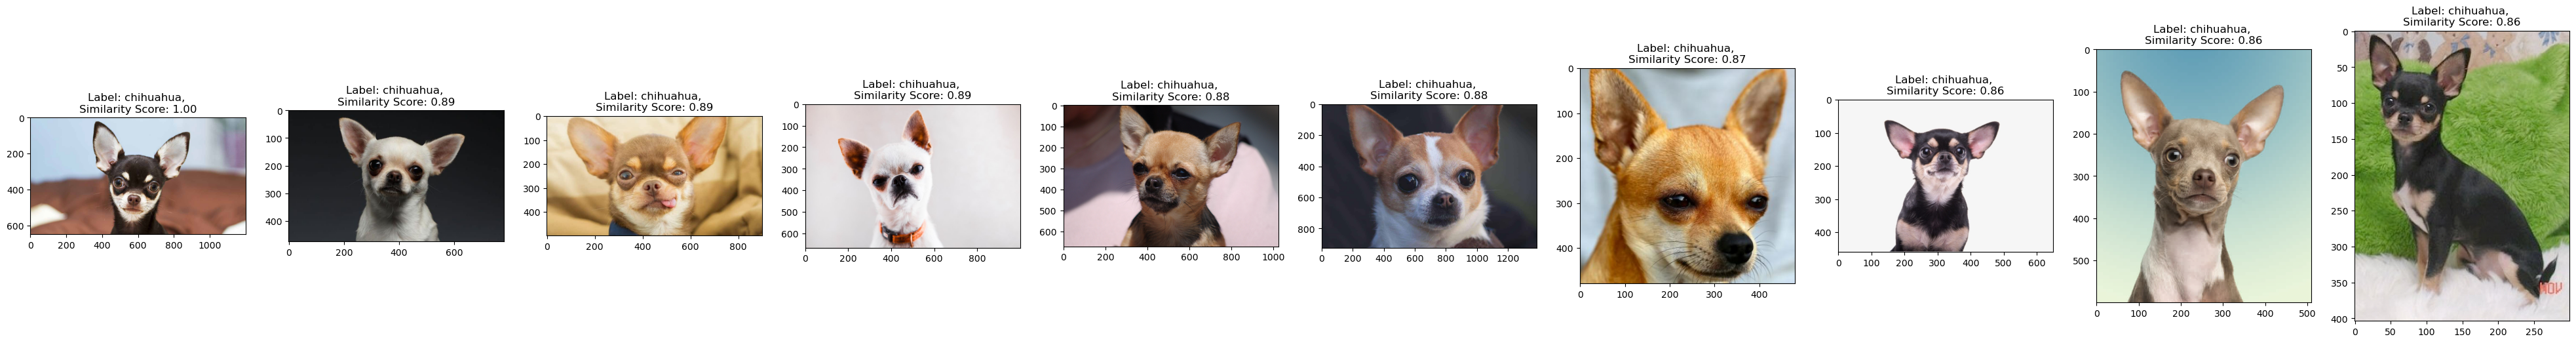

In [122]:
display_similar_images(top_10)